In [1]:
import pandas as pd

from lets_plot import *


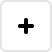
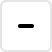
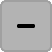
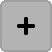
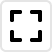
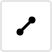
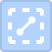
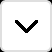
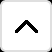
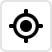
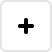
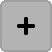
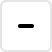
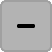
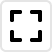
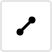
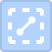
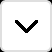
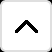
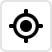

In [2]:
LetsPlot.setup_html()

### Formatting based on `DataType`

In [3]:
df1 = pd.DataFrame({
    'x': ['a', 'b'],
    'd': [100000, 200000],
    'f': [100000.0, 200000.0],
})
df1

,x,d,f
0,a,100000,100000.0
1,b,200000,200000.0


In [4]:
def plot1(col):
    return ggplot(df1) + \
        geom_point(aes(x='x'), y=0, tooltips=layer_tooltips().line("@{0}".format(col))) + \
        geom_text(aes(x='x', label=col), y=0, nudge_y=.1) + \
        scale_y_continuous(limits=[-.5, .5]) + \
        ggtitle("data type = {0}".format(df1.dtypes[col]))

gggrid([plot1('d'), plot1('f')])

### Formatting based on `NumericBreakFormatter`

In [5]:
def plot2(step_power):
    c = 1.2345
    values = [(c * 10**step_power) * v for v in range(1, 10)]
    return ggplot() + \
        geom_point(aes(y=values)) + \
        ggtitle("step = {0} * 10**{1}".format(c, step_power))

gggrid([
    plot2(5),
    plot2(6),
])

### Formatting depends on binding

In [6]:
values = [1e6 + 1.2345678 * v * 10**4 for v in range(1, 11)]
df3 = pd.DataFrame(dict(
    x = ['a'] * len(values),
    y = values,
    v1 = values,
    v2 = values
))
df3.head(3)

,x,y,v1,v2
0,a,1012345.678,1012345.678,1012345.678
1,a,1024691.356,1024691.356,1024691.356
2,a,1037037.034,1037037.034,1037037.034


In [7]:
def plot3(*, point_tooltips=None, summary_tooltips=None):
    return ggplot(df3, aes('x', 'y')) + \
        geom_point(position=position_nudge(x=-.1), tooltips=point_tooltips) + \
        stat_summary(tooltips=summary_tooltips) + \
        ggtitle("point tooltips: {0}\nsummary tooltips: {1}".format(
            "default" if point_tooltips is None else "specified",
            "default" if summary_tooltips is None else "specified"
        ))

gggrid([
    plot3(),
    plot3(
        point_tooltips=layer_tooltips(["y", "v1", "v2"]).format("@v2", ".2f"),
        summary_tooltips=layer_tooltips().format("^y", ".2f").format("^ymin", ".2f").format("^ymax", ".2f")
    ),
])